# Récursivité et Programmation Dynamique

# La reproduction des lapins

Nous allons utiliser 2 grandes méthodes de programmation que nous allons appliquer à un problème célèbre et récurrent dans le milieu de la programmation.

En 1202, Leonardo Fibonacci publie un ouvrage dans lequel il traite d'un problème simple et concret : la croissance d'une population de lapins. Il s'agit de savoir comment contrôler la population des clapiers et quand vendre ses lapins, etc.

Voici le fonctionnement simplifié de cette reproduction :

1. On compte les lapins par **couple**
2. **Chaque mois** chaque couple de lapins matures donne naissance à 1 couple de jeunes lapins immatures
3. Après 2 mois les jeunes couples devienent matures et engendrent à leur tour un jeune couple immature
4. On étudie la croissance de la population tous les mois : n est le nombre de mois

|                n               | 0 | 1 | 2 | 3 | 4 | 5 | 6 |  7 |  8 |  9 | 10 |
|:------------------------------:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:--:|:--:|:--:|:--:|
|       nb couples matures       | 0 | 0 | 0 | 1 | 1 | 2 | 3 |  5 |  8 | 13 | 21 |
|  nb couples immatures 1er mois | 0 | 1 | 0 | 1 | 1 | 2 | 3 |  5 |  8 | 13 | 21 |
| nb couples immatures 2ème mois | 0 | 0 | 1 | 0 | 1 | 1 | 2 |  3 |  5 |  8 | 13 |
|           nb couples           | 0 | 1 | 1 | 2 | 3 | 5 | 8 | 13 | 21 | 34 | 55 |

- Complétez les mois manquants en respectant les règles de reproduction.

- En vous inspirant de la méthode que vous avez employée pour compléter le tableau ci-dessus, écrivez une fonction `lapinoux(n)` qui retourne le nombre de couples de lapin obtenus au mois n.
- Testez votre fonction pour des valeurs de n entre 0 et 10.

In [32]:
def lapinoux(n: int) -> int:
    """ Calcule le nombre de couples de lapins au bout de n mois (n>=0) """
    assert isinstance(n, int) and n >= 0, "n must be integer and positive"
    
    nb_couples_matures = 0
    nb_couples_immatures1 = 1
    nb_couples_immatures2 = 0
    
    for i in range(n+1):
        nb_couples_matures += nb_couples_immatures2
        nb_couples_immatures2 = nb_couples_immatures1
        nb_couples_immatures1 = nb_couples_matures
    
    return nb_couples_matures

def lapinoux_base(n: int) -> int:
    """ Calcule le nombre de couples de lapins au bout de n mois (n>=0) """
    assert isinstance(n, int) and n >= 0, "n must be integer and positive"
    
    if n <= 0 : return 0
    nb_couples_matures = 0
    nb_couples_immatures1 = 1
    nb_couples_immatures2 = 0
    
    for i in range(2,n+1):
        nb_couples_matures += nb_couples_immatures2
        nb_couples_immatures2 = nb_couples_immatures1
        nb_couples_immatures1 = nb_couples_matures

    return nb_couples_matures + nb_couples_immatures1 + nb_couples_immatures2

for i in range(11):
    print(f"Pour n={i} le nombre de couples vaut:{lapinoux(i)}")

Pour n=0 le nombre de couples vaut:0
Pour n=1 le nombre de couples vaut:1
Pour n=2 le nombre de couples vaut:1
Pour n=3 le nombre de couples vaut:2
Pour n=4 le nombre de couples vaut:3
Pour n=5 le nombre de couples vaut:5
Pour n=6 le nombre de couples vaut:8
Pour n=7 le nombre de couples vaut:13
Pour n=8 le nombre de couples vaut:21
Pour n=9 le nombre de couples vaut:34
Pour n=10 le nombre de couples vaut:55


🏁 **Terminaison** : la fonction termine toujours car elle est constituée d'un boucle finie `for ... range`.

🐌 **Complexité** : $O(n)$ car à chaque fois qu'on augmente n de 1 on ajoute un tour de boucle avec 3 affectations et 1 addition.

# Suite de Fibonacci

Comme vous êtes de bons élèves en mathématiques, il ne vous a pas échappé que ce fonctionnement pouvait se formaliser sous forme de suite mathématique qu'on nomme la **Suite de Fibonacci**.

En effet, vous avez pu constater que pour obtenir un terme pour un mois donné, il suffisait de faire la somme des termes des 2 mois précédents : `fibo(0) = 0 ; fibo(1) = 1 ; fibo(n) = fibo(n-1) + fibo(n-2)`.

- Reprogrammez la fonction précédente en la nommant `fibo(n)` mais cette fois en utilisant la définition de la suite ci-dessus.

- Testez votre fonction pour des valeurs de n entre 0 et 10.

In [33]:
def fibo(n: int) -> int:
    """ Calcule les termes de la suite de Fibonacci (n>=0) """
    assert isinstance(n, int) and n >= 0, "n must be integer and positive"
    
    if n <= 0: return 0
    elif n <= 1: return 1
    
    un_moins_2 = 0
    un_moins_1 = 1
       
    for i in range(2,n+1):
        un = un_moins_1 + un_moins_2
        un_moins_2 = un_moins_1
        un_moins_1 = un
    return un

for i in range(11):
    print(f"Pour n={i} le nombre de couples vaut:{fibo(i)}")

Pour n=0 le nombre de couples vaut:0
Pour n=1 le nombre de couples vaut:1
Pour n=2 le nombre de couples vaut:1
Pour n=3 le nombre de couples vaut:2
Pour n=4 le nombre de couples vaut:3
Pour n=5 le nombre de couples vaut:5
Pour n=6 le nombre de couples vaut:8
Pour n=7 le nombre de couples vaut:13
Pour n=8 le nombre de couples vaut:21
Pour n=9 le nombre de couples vaut:34
Pour n=10 le nombre de couples vaut:55


🏁 **Terminaison** : la fonction termine toujours car elle est constituée d'un boucle finie `for ... range`.

🐌 **Complexité** : $O(n)$ car à chaque fois qu'on augmente n de 1 on ajoute un tour de boucle avec 3 affectations et 1 addition.

# Récursivité

⚠️ En informatique une fonction peut **s'appeler elle-même**, c'est ce qu'on nomme une **fonction récursive**. Faisons un exemple pour voir :

In [10]:
def recursive_infinie():
    print("Lancement de la fonction recursive_infinie()")
    recursive_infinie()
    
recursive_infinie()

Lancement de la fonction recursive_infinie()
Lancement de la fonction recursive_infinie()
Lancement de la fonction recursive_infinie()
Lancement de la fonction recursive_infinie()
Lancement de la fonction recursive_infinie()
Lancement de la fonction recursive_infinie()
Lancement de la fonction recursive_infinie()
Lancement de la fonction recursive_infinie()
Lancement de la fonction recursive_infinie()
Lancement de la fonction recursive_infinie()
Lancement de la fonction recursive_infinie()
Lancement de la fonction recursive_infinie()
Lancement de la fonction recursive_infinie()
Lancement de la fonction recursive_infinie()
Lancement de la fonction recursive_infinie()
Lancement de la fonction recursive_infinie()
Lancement de la fonction recursive_infinie()
Lancement de la fonction recursive_infinie()
Lancement de la fonction recursive_infinie()
Lancement de la fonction recursive_infinie()
Lancement de la fonction recursive_infinie()
Lancement de la fonction recursive_infinie()
Lancement 

RecursionError: maximum recursion depth exceeded while calling a Python object

Vous constatez que la fonction **s'appelle elle-même** sans s'arrêter jusqu'à provoquer l'erreur : *RecursionError: maximum recursion depth exceeded while calling a Python object*. Qui se traduit littéralement par : *Ta function ne s'arrête pas gros noob !*

⚠️ Quand nous écrivons une **fonction récursive**, il faut s'assurer que la **fonction s'arrête à coup sûr** ! Il faut donc bien écrire le ou les **cas d'arrêt**.

Essayons cet autre exemple :

In [3]:
def recursive(n: int):
    print(f"On est dans la fonction recursive({n})")
    if n <= 0 :
        print("C'est fini !")
    else :
        recursive(n-1)
    
recursive(10)

On est dans la fonction recursive(10)
On est dans la fonction recursive(9)
On est dans la fonction recursive(8)
On est dans la fonction recursive(7)
On est dans la fonction recursive(6)
On est dans la fonction recursive(5)
On est dans la fonction recursive(4)
On est dans la fonction recursive(3)
On est dans la fonction recursive(2)
On est dans la fonction recursive(1)
On est dans la fonction recursive(0)
C'est fini !


- Écrivez la fonction `fibor(n)` pour calculer les termes de la Suite de Fibonacci en utilisant une **fonction récursive**. Pour cela vous devez utiliser le fait que `fibor(n)` doit **retourner** `fibor(n-1) + fibor(n-2)` ! Et pensez aux cas d'arrêt !
- Testez votre fonction pour des valeurs de n entre 0 et 10.

In [4]:
def fibor(n: int) -> int:
    """ Calcule les termes de la suite de Fibonacci récursivement (n>=0) """
    assert isinstance(n, int) and n >= 0, "n must be integer and positive"
    
    if n < 2: return n
    else: return fibor(n-1) + fibor(n-2)
        
for i in range(11):
    print(f"Pour n={i} le nombre de couples vaut:{fibor(i)}")

Pour n=0 le nombre de couples vaut:0
Pour n=1 le nombre de couples vaut:1
Pour n=2 le nombre de couples vaut:1
Pour n=3 le nombre de couples vaut:2
Pour n=4 le nombre de couples vaut:3
Pour n=5 le nombre de couples vaut:5
Pour n=6 le nombre de couples vaut:8
Pour n=7 le nombre de couples vaut:13
Pour n=8 le nombre de couples vaut:21
Pour n=9 le nombre de couples vaut:34
Pour n=10 le nombre de couples vaut:55


🏁 **Terminaison** : la fonction termine toujours car elle est appelée récursivement avec des paramètres entiers positifs **décroissants** donc ils arriveront forcément à 0 et 1 ce qui **arrêtera les appels récursifs**.

🐌 **Complexité** : $O(A^n)$, chaque appel de la fonction avec un nombre n plus grand déploie un arbre d'appel qui croît exponentiellement.

Cette méthode de programmation **récursive** est séduisante car elle permet de **programmer simplement** des problèmes **difficiles** (parcours de structures, etc.). Mais elle a un gros défaut, c'est qu'elle est souvent **peu performante** en terme de **temps de calcul** et **d'efficacité mémoire**. Voyons pourquoi.

- Ajouter à votre fonction un `print` qui permet de voir toutes les fonctions appelées. Ensuite testez `fibor(10)`

In [2]:
compteur = 0

def fibor(n: int) -> int:
    """ Calcule les termes de la suite de Fibonacci récursivement (n>=0) """
    assert isinstance(n, int) and n >= 0, "n must be integer and positive"
    global compteur
    compteur += 1
    print(f"On calcule fibor({n})")
    if n < 2: return n
    else: return fibor(n-1) + fibor(n-2)
        
print(fibor(10))
print("fibor lancée", compteur, "fois")

On calcule fibor(10)
On calcule fibor(9)
On calcule fibor(8)
On calcule fibor(7)
On calcule fibor(6)
On calcule fibor(5)
On calcule fibor(4)
On calcule fibor(3)
On calcule fibor(2)
On calcule fibor(1)
On calcule fibor(0)
On calcule fibor(1)
On calcule fibor(2)
On calcule fibor(1)
On calcule fibor(0)
On calcule fibor(3)
On calcule fibor(2)
On calcule fibor(1)
On calcule fibor(0)
On calcule fibor(1)
On calcule fibor(4)
On calcule fibor(3)
On calcule fibor(2)
On calcule fibor(1)
On calcule fibor(0)
On calcule fibor(1)
On calcule fibor(2)
On calcule fibor(1)
On calcule fibor(0)
On calcule fibor(5)
On calcule fibor(4)
On calcule fibor(3)
On calcule fibor(2)
On calcule fibor(1)
On calcule fibor(0)
On calcule fibor(1)
On calcule fibor(2)
On calcule fibor(1)
On calcule fibor(0)
On calcule fibor(3)
On calcule fibor(2)
On calcule fibor(1)
On calcule fibor(0)
On calcule fibor(1)
On calcule fibor(6)
On calcule fibor(5)
On calcule fibor(4)
On calcule fibor(3)
On calcule fibor(2)
On calcule fibor(1)

Vous constatez que la fonction `fibor` est lancée **177 fois** ! Et surtout, on calcule les mêmes valeurs plusieurs fois, par exemple on calcule **8 fois** `fibor(5)` !

Cette image montre bien le problème pour `fibor(6)` :



On voit dans l'arbre des appels successifs que `fibor(4)` est calculé 2 fois et `fibor(3)` 3 fois. Ce qui est évidemment **inefficace**.

On peut, en général, améliorer la **récursivité** en faisant de la **récursivité terminale**, mais nous approfondirons ce problème plus tard...

⚠️ Retenons pour l'instant que la **récursivité** permet de programmer avec **simplicité et élégance** des problème **difficiles** mais souvent au **détriment de la performance**.

# Programmation dynamique

Le gros défaut de l'algorithme précédent est qu'il **recalcule** sans cesse les **mêmes termes** inutilement. Il existe une méthode de programmation qui répond justement à ce problème :

⚠️ La **programmation dynamique** est une méthode de programmation qui consiste à **enregistrer des résultats de calculs intermédiaires** pour les **réutiliser plus tard afin d'éviter de les recalculer**.

- Écrivez la fonction `fibordyn` qui calcule les termes de la suite de Fibonacci **récursivement** mais avec une **liste pour enregistrer les résultats intermédiaires** que vous consulterez avant de recommencer un calcul.

- Testez votre fonction avec n = 10.

In [7]:
def fibordyn1(n: int) -> int:
    """ Lanceur de la fonction fibor (n>=0) : initialisation du tableau de résultats """
    assert isinstance(n, int) and n >= 0, "n must be integer and positive"
    resultats = [None for i in range(n+2)]
    resultats[0] = 0
    resultats[1] = 1
    return fibor1(n, resultats)

def fibor1(n: int, resultats: list) -> int:
    """ Calcule les termes de la suite de Fibonacci récursivement avec programmation dynamique (n>=0) """
    assert isinstance(n, int) and n >= 0, "n must be integer and positive"
    print(f"On appelle fibor({n})")

    if resultats[n] == None:
        resultats[n] = fibor1(n-1, resultats) + fibor1(n-2, resultats)
    
    return resultats[n]

def fibordyn2(n: int) -> int:
    """ Lanceur de la fonction fibor (n>=0) : initialisation du tableau de résultats """
    assert isinstance(n, int) and n >= 0, "n must be integer and positive"
    resultats = [None for i in range(n+2)]
    resultats[0] = 0
    resultats[1] = 1
    return fibor2(n, resultats)

def fibor2(n: int, resultats: list) -> int:
    """ Calcule les termes de la suite de Fibonacci récursivement avec programmation dynamique (n>=0) """
    assert isinstance(n, int) and n >= 0, "n must be integer and positive"
    print(f"On appelle fibor({n})")
    if resultats[n] != None: return resultats[n]
    if resultats[n-1] == None: resultats[n-1] = fibor2(n-1, resultats)
    if resultats[n-2] == None: resultats[n-2] = fibor2(n-2, resultats)
    return resultats[n-1] + resultats[n-2]

def fibordyn3(n: int) -> int:
    """ Lanceur de la fonction fibor (n>=0) : initialisation du tableau de résultats """
    assert isinstance(n, int) and n >= 0, "n must be integer and positive"
    resultats = [None for i in range(n+2)]
    resultats[0] = 0
    resultats[1] = 1
    
    # === Nested function ===
    def fibor3(n: int) -> int:
        """ Calcule les termes de la suite de Fibonacci récursivement avec programmation dynamique (n>=0) """
        assert isinstance(n, int) and n >= 0, "n must be integer and positive"
        print(f"On appelle fibor({n})")
        
        if resultats[n] != None: return resultats[n]
        if resultats[n-1] == None: resultats[n-1] = fibor3(n-1)
        if resultats[n-2] == None: resultats[n-2] = fibor3(n-2)
        return resultats[n-1] + resultats[n-2]
    # === End of nested function ===
    
    return fibor3(n)

print(fibordyn1(10))
print(fibordyn2(10))
print(fibordyn3(10))

On appelle fibor(10)
On appelle fibor(9)
On appelle fibor(8)
On appelle fibor(7)
On appelle fibor(6)
On appelle fibor(5)
On appelle fibor(4)
On appelle fibor(3)
On appelle fibor(2)
On appelle fibor(1)
On appelle fibor(0)
On appelle fibor(1)
On appelle fibor(2)
On appelle fibor(3)
On appelle fibor(4)
On appelle fibor(5)
On appelle fibor(6)
On appelle fibor(7)
On appelle fibor(8)
55
On appelle fibor(10)
On appelle fibor(9)
On appelle fibor(8)
On appelle fibor(7)
On appelle fibor(6)
On appelle fibor(5)
On appelle fibor(4)
On appelle fibor(3)
On appelle fibor(2)
55
On appelle fibor(10)
On appelle fibor(9)
On appelle fibor(8)
On appelle fibor(7)
On appelle fibor(6)
On appelle fibor(5)
On appelle fibor(4)
On appelle fibor(3)
On appelle fibor(2)
55


🏁 **Terminaison** : la fonction termine toujours car elle est appelée récursivement avec des paramètres entiers positifs **décroissants** donc ils arriveront forcément à 0 et 1 ce qui **arrêtera les appels récursifs**.

🐌 **Complexité** : $O(n)$, on appelle n+1 fois la fonction `fibor()` qui contient des tests, des affectations, des additions mais aussi des **accès à des listes qui se font en temps constant en Python**.

⚠️ Je vous conseille de faire un arbre d'appel avec `n = 5` pour comprendre exactement comment marche ce programme car c'est plus subtil qu'il n'y parait ! C'est l'occasion d'utiliser [Python Tutor](http://www.pythontutor.com/visualize.html#mode=edit) !

# Performances

Nous avons donc 4 algorithmes différents pour calculer la croissance de la population de nos couples de lapins. Testons leurs performances.

- **Copier-coller** la définition de votre fonction `lapinoux` au début de la cellule ci-dessous et exécutez la cellule pour analyser les performances.

Test avec n=10 - Test avec n=1010 - Test avec n=2010 - Test avec n=3010 - Test avec n=4010 - Test avec n=5010 - Test avec n=6010 - Test avec n=7010 - Test avec n=8010 - Test avec n=9010 - Test avec n=10010 - Test avec n=11010 - Test avec n=12010 - Test avec n=13010 - Test avec n=14010 - Test avec n=15010 - Test avec n=16010 - Test avec n=17010 - Test avec n=18010 - Test avec n=19010 - Test avec n=20010 - Test avec n=21010 - Test avec n=22010 - Test avec n=23010 - Test avec n=24010 - Test avec n=25010 - Test avec n=26010 - Test avec n=27010 - Test avec n=28010 - Test avec n=29010 - Test avec n=30010 - Test avec n=31010 - Test avec n=32010 - Test avec n=33010 - Test avec n=34010 - Test avec n=35010 - Test avec n=36010 - Test avec n=37010 - Test avec n=38010 - Test avec n=39010 - Test avec n=40010 - Test avec n=41010 - Test avec n=42010 - Test avec n=43010 - Test avec n=44010 - Test avec n=45010 - Test avec n=46010 - Test avec n=47010 - Test avec n=48010 - Test avec n=49010 - Test avec n=

<IPython.core.display.Javascript object>


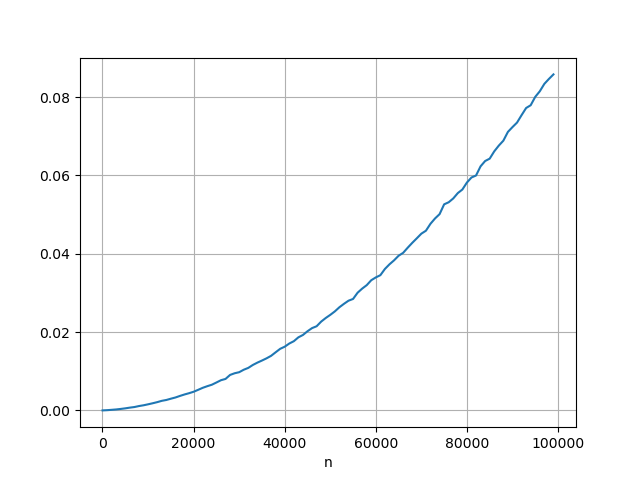



Temps d'execution de lapinoux avec n=99010 : 0.08579590969999984


In [7]:
def lapinoux(n: int) -> int:
    """ Calcule le nombre de couples de lapins au bout de n mois (n>=0) """
    assert isinstance(n, int) and n >= 0, "n must be integer and positive"
    nb_couples_immatures1 = 1
    nb_couples_immatures2 = 0
    nb_couples_matures = 0
    
    for i in range(n+1):
        nb_couples_matures += nb_couples_immatures2
        nb_couples_immatures2 = nb_couples_immatures1
        nb_couples_immatures1 = nb_couples_matures
    
    return nb_couples_matures

# Mesure du temps et tracés
import time
%matplotlib notebook
import matplotlib.pyplot as plt

n = [i for i in range(10, 100000, 1000)]
liste_temps = []

for i in n:
    print(f"Test avec n={i}", end = " - ")
    temps = 0.0
    nb_loops = 10
    for test in range(nb_loops):
        start = time.process_time()
        lapinoux(i)
        temps += time.process_time() - start
    temps /= nb_loops
    liste_temps.append(temps)

plt.plot(n, liste_temps, label="lapinoux")
plt.xlabel("n")
plt.grid(True)
print(f"\n\nTemps d'execution de lapinoux avec n={n[-1]} : {liste_temps[-1]}")

On constate que le temps d'exécution en fonction de `n` n'est **pas linéaire** comme la complexité le laissait supposer... ???

- **Copier-coller** la définition de votre fonction `fibo` au début de la cellule suivante et exécutez la cellule pour analyser les performances.

Test avec n=10 - Test avec n=1010 - Test avec n=2010 - Test avec n=3010 - Test avec n=4010 - Test avec n=5010 - Test avec n=6010 - Test avec n=7010 - Test avec n=8010 - Test avec n=9010 - Test avec n=10010 - Test avec n=11010 - Test avec n=12010 - Test avec n=13010 - Test avec n=14010 - Test avec n=15010 - Test avec n=16010 - Test avec n=17010 - Test avec n=18010 - Test avec n=19010 - Test avec n=20010 - Test avec n=21010 - Test avec n=22010 - Test avec n=23010 - Test avec n=24010 - Test avec n=25010 - Test avec n=26010 - Test avec n=27010 - Test avec n=28010 - Test avec n=29010 - Test avec n=30010 - Test avec n=31010 - Test avec n=32010 - Test avec n=33010 - Test avec n=34010 - Test avec n=35010 - Test avec n=36010 - Test avec n=37010 - Test avec n=38010 - Test avec n=39010 - Test avec n=40010 - Test avec n=41010 - Test avec n=42010 - Test avec n=43010 - Test avec n=44010 - Test avec n=45010 - Test avec n=46010 - Test avec n=47010 - Test avec n=48010 - Test avec n=49010 - Test avec n=

<IPython.core.display.Javascript object>


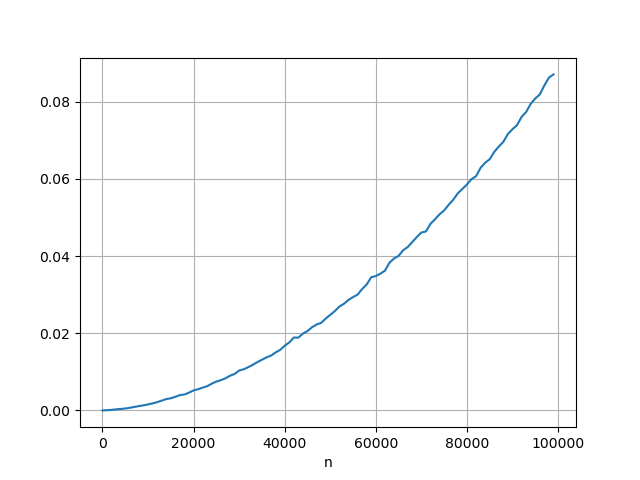



Temps d'execution de fibo avec n=99010 : 0.08708674800000082


In [8]:
def fibo(n: int) -> int:
    """ Calcule les termes de la suite de Fibonacci (n>=0) """
    assert isinstance(n, int) and n >= 0, "n must be integer and positive"
    
    if n <= 1: return 1
    elif n <= 0: return 0

    un_moins_2 = 0
    un_moins_1 = 1
    
    for i in range(2,n+1):
        un = un_moins_1 + un_moins_2
        un_moins_2 = un_moins_1
        un_moins_1 = un
    return un

# Mesure du temps et tracés
import time
%matplotlib notebook
import matplotlib.pyplot as plt

n = [i for i in range(10, 100000, 1000)]
liste_temps = []

for i in n:
    print(f"Test avec n={i}", end = " - ")
    temps = 0.0
    nb_loops = 10
    for test in range(nb_loops):
        start = time.process_time()
        fibo(i)
        temps += time.process_time() - start
    temps /= nb_loops
    liste_temps.append(temps)

plt.plot(n, liste_temps, label="fibo")
plt.xlabel("n")
plt.grid(True)
print(f"\n\nTemps d'execution de fibo avec n={n[-1]} : {liste_temps[-1]}")

Nous obtenons des résultats identiques à la fonction précédente, ce qui est normal puisque ces fonctions sont presques identiques.

- **Copier-coller** la définition de votre fonction `fibor` au début de la cellule suivante et exécutez la cellule pour analyser les performances.

Test avec n=5 - Test avec n=7 - Test avec n=9 - Test avec n=11 - Test avec n=13 - Test avec n=15 - Test avec n=17 - Test avec n=19 - Test avec n=21 - Test avec n=23 - Test avec n=25 - Test avec n=27 - Test avec n=29 - Test avec n=31 - Test avec n=33 - Test avec n=35 - Test avec n=37 - Test avec n=39 - 

<IPython.core.display.Javascript object>


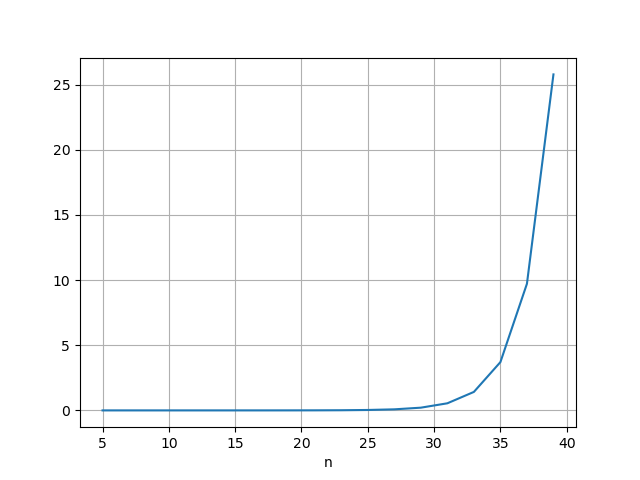



Temps d'execution de fibor avec n=39 : 25.778192887666663


In [9]:
def fibor(n: int) -> int:
    """ Calcule les termes de la suite de Fibonacci récursivement (n>=0) """
    assert isinstance(n, int) and n >= 0, "n must be integer and positive"
    if n <= 0: return 0
    elif n <= 1: return 1
    else: return fibor(n-1) + fibor(n-2)

# Mesure du temps et tracés
import time
%matplotlib notebook
import matplotlib.pyplot as plt
n = [i for i in range(5, 40, 2)]
liste_temps = []

for i in n:
    print(f"Test avec n={i}", end = " - ")
    temps = 0.0
    nb_loops = 3
    for test in range(nb_loops):
        start = time.process_time()
        fibor(i)
        temps += time.process_time() - start
    temps /= nb_loops
    liste_temps.append(temps)

plt.plot(n, liste_temps, label="fibor")
plt.xlabel("n")
plt.grid(True)
print(f"\n\nTemps d'execution de fibor avec n={n[-1]} : {liste_temps[-1]}")

Comme prévu, le temps d'exécution est bien **exponentiel** en fonction du nombre n. Cet algorithme **récursif** est très **esthétique** dans son écriture mais c'est une **catastrophe en terme de performance** : 25 sec pour n = 39 seulement !

- **Copier-coller** la définition de votre fonction `fibordyn` au début de la cellule suivante et exécutez la cellule pour analyser les performances.

Test avec n=10 - Test avec n=35 - Test avec n=60 - Test avec n=85 - Test avec n=110 - Test avec n=135 - Test avec n=160 - Test avec n=185 - Test avec n=210 - Test avec n=235 - Test avec n=260 - Test avec n=285 - Test avec n=310 - Test avec n=335 - Test avec n=360 - Test avec n=385 - Test avec n=410 - Test avec n=435 - Test avec n=460 - Test avec n=485 - Test avec n=510 - Test avec n=535 - Test avec n=560 - Test avec n=585 - Test avec n=610 - Test avec n=635 - Test avec n=660 - Test avec n=685 - Test avec n=710 - Test avec n=735 - Test avec n=760 - Test avec n=785 - Test avec n=810 - Test avec n=835 - Test avec n=860 - Test avec n=885 - Test avec n=910 - Test avec n=935 - Test avec n=960 - Test avec n=985 - Test avec n=1010 - Test avec n=1035 - Test avec n=1060 - Test avec n=1085 - Test avec n=1110 - Test avec n=1135 - Test avec n=1160 - Test avec n=1185 - Test avec n=1210 - Test avec n=1235 - Test avec n=1260 - Test avec n=1285 - Test avec n=1310 - Test avec n=1335 - Test avec n=1360 -

<IPython.core.display.Javascript object>


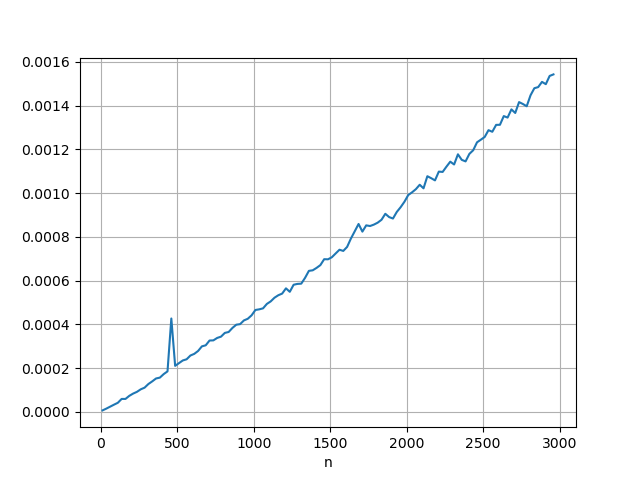



Temps d'execution de fibor avec n=2960 : 0.001542809620000014


In [8]:
def fibordyn(n: int) -> int:
    """ Lanceur de la fonction fibor (n>=0) : initialisation du tableau de résultats """
    assert isinstance(n, int) and n >= 0, "n must be integer and positive"
    resultats = [None for i in range(n+2)]
    resultats[0] = 0
    resultats[1] = 1
    
    # === Nested function ===
    def fibor(n: int) -> int:
        """ Calcule les termes de la suite de Fibonacci récursivement avec programmation dynamique (n>=0) """
        assert isinstance(n, int) and n >= 0, "n must be integer and positive"

        if resultats[n] != None: return resultats[n]
        if resultats[n-1] == None: resultats[n-1] = fibor(n-1)
        if resultats[n-2] == None: resultats[n-2] = fibor(n-2)
        return resultats[n-1] + resultats[n-2]
    # === End of nested function ===
    
    return fibor(n)

# Mesure du temps et tracés
import time
%matplotlib notebook
import matplotlib.pyplot as plt
n = [i for i in range(10, 2985, 25)]
liste_temps = []

for i in n:
    print(f"Test avec n={i}", end = " - ")
    temps = 0.0
    nb_loops = 100
    for test in range(nb_loops):
        start = time.process_time()
        fibordyn(i)
        temps += time.process_time() - start
    temps /= nb_loops
    liste_temps.append(temps)

plt.plot(n, liste_temps, label="fibor")
plt.xlabel("n")
plt.grid(True)
print(f"\n\nTemps d'execution de fibor avec n={n[-1]} : {liste_temps[-1]}")

Ici le temps d'exécution est bien **linéaire** en fonction de n.

⚠️ Mais il y a **trop d'appels de fonctions** imbriqués et Python ne peut pas calculer au delà de n=2900.

Malgré tout, les performances sont bien en dessous de nos premiers algorithmes car ici il faut environ 1 ms pour calculer le terme avec n=2960 alors qu'il en fallait à peine 0.25 ms avec les premiers.

# Conclusion

⚠️ La **récursivité** permet de résoudre **facilement** des **problèmes complexes** mais elle s'accompagne souvent de **problèmes de performances**.

⚠️ La **programmation dynamique** permet de gagner du temps dans les algorithmes car elle consiste à **enregistrer les résultats intermédiaires calculés** afin de les **ré-utiliser plus tard** dans l'algorithme.

Cette technique est souvent utilisée dans les problèmes **d'optimisation** car dans ce domaine, les calculs utilisent souvent **plusieurs fois les mêmes valeurs**.